In [1]:
pip --version


pip 23.3.1 from C:\Users\Shivani Bhujbal\anaconda3\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [7]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
X_train[0].shape

(28, 28)

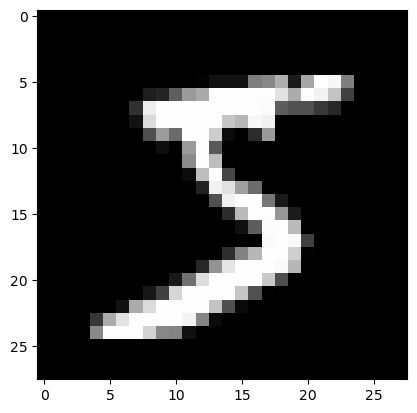

In [10]:
plt.imshow(X_train[0],cmap="gray")

In [11]:
y_train[0]

5

In [12]:
image_height, image_width=28,28

In [13]:
X_train=X_train.reshape(60000, image_height*image_width)
X_test=X_test.reshape(10000, image_height*image_width)

print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [14]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [15]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [16]:
X_train/=255.0
X_test/=255.0

In [17]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [18]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [19]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [21]:
model=Sequential()

model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))



C:\Users\Shivani Bhujbal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"]) 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history= model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.9053 - loss: 0.3061 - val_accuracy: 0.9686 - val_loss: 0.0983
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9751 - loss: 0.0786 - val_accuracy: 0.9724 - val_loss: 0.0897
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9822 - loss: 0.0569 - val_accuracy: 0.9702 - val_loss: 0.1045
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9869 - loss: 0.0407 - val_accuracy: 0.9751 - val_loss: 0.0874
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9831 - val_loss: 0.0636
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9907 - loss: 0.0284 - val_accuracy: 0.9788 - val_loss: 0.0790
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9775 - val_loss: 0.1035
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9925 -

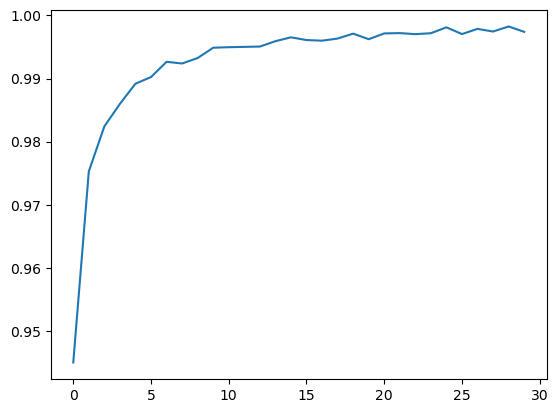

In [26]:
plt.plot(history.history['accuracy'])

In [27]:
score=model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9806 - loss: 0.1976


In [28]:
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [29]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [31]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [32]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [33]:
X_train/=255.0
X_test/=255.0

In [34]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [36]:
cnn=Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"]) 
print(cnn.summary())

C:\Users\Shivani Bhujbal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,634 (432.16 KB)

 Trainable params: 110,634 (432.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [37]:
history_cnn=cnn.fit(X_train, y_train, epochs=30, verbose=1,validation_data=(X_train, y_train))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.8949 - loss: 0.3462 - val_accuracy: 0.9793 - val_loss: 0.0655
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9842 - loss: 0.0517 - val_accuracy: 0.9885 - val_loss: 0.0369
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9890 - loss: 0.0338 - val_accuracy: 0.9924 - val_loss: 0.0238
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.9952 - val_loss: 0.0145
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9944 - loss: 0.0189 - val_accuracy: 0.9953 - val_loss: 0.0150
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9955 - loss: 0.0142 - val_accuracy: 0.9975 - val_loss: 0.0089
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 0.9973 - val_loss: 0.0085
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9967 -

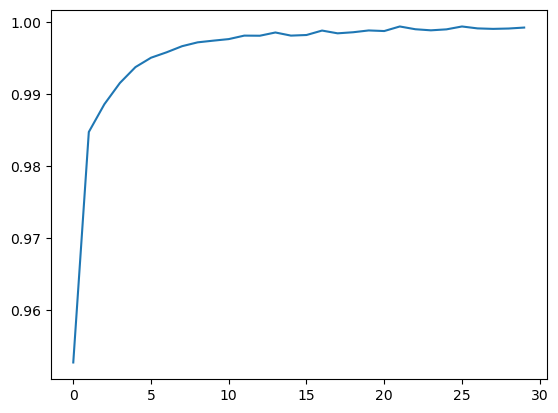

In [38]:
plt.plot(history_cnn.history['accuracy'])

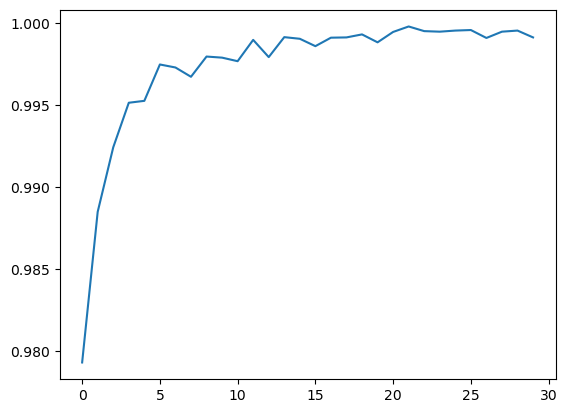

In [39]:
plt.plot(history_cnn.history['val_accuracy'])